In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Reshape to 4D tensors for Conv2D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [6]:
# Encoder
encoder = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu', name="latent")  # bottleneck
])

# Decoder
decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(7 * 7 * 64, activation='relu'),
    layers.Reshape((7, 7, 64)),
    layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu'),
    layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu'),
    layers.Conv2D(1, 3, activation='sigmoid', padding='same')  # output
])

# Combine
autoencoder_input = tf.keras.Input(shape=(28, 28, 1))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = tf.keras.Model(autoencoder_input, decoded)


In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 0.2967 - val_loss: 0.1269
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.1208 - val_loss: 0.1097
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1071 - val_loss: 0.1013
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1006 - val_loss: 0.0979
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0969 - val_loss: 0.0955
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0943 - val_loss: 0.0938
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0926 - val_loss: 0.0928
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0918 - val_loss: 0.0918
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0909 - val_loss: 0.0910
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0899 - val_loss: 0.0905


In [8]:
def generate_images_for_digit(digit, n=5):
    # Get 'n' real examples of this digit
    indices = np.where(y_train == digit)[0][:n]
    original_imgs = x_train[indices]

    # Reconstruct through autoencoder
    recon_imgs = autoencoder.predict(original_imgs)

    # Plot
    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(2, n, i+1)
        plt.imshow(original_imgs[i].squeeze(), cmap='gray')
        plt.axis('off')

        plt.subplot(2, n, i+1+n)
        plt.imshow(recon_imgs[i].squeeze(), cmap='gray')
        plt.axis('off')

    plt.suptitle(f"Original and Reconstructed {digit}'s")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step


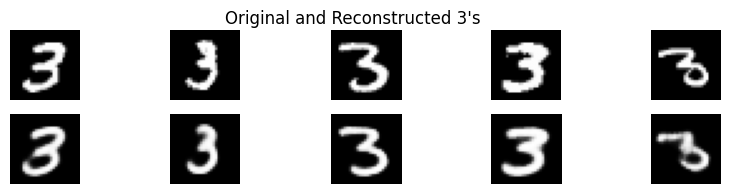

In [9]:
generate_images_for_digit(3, n=5)


In [10]:
autoencoder.save("autoencoder_model.h5")
